<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/main/%EC%9D%B4%EA%B2%B8%ED%9D%AC/%EA%B3%BC%EC%A0%9C2_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <header1>과제2</header1>

### 이겸희_성균관대 

### 학습 준비단계

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')
print('g-drive mounted.')

Mounted at /content/drive
g-drive mounted.


In [ ]:
!unzip -q -o /content/drive/MyDrive/TL_81_단일.zip

In [12]:
!unzip -q -o /content/drive/MyDrive/TS_81_단일.zip

In [5]:
import pandas as pd
import numpy as np
import sys
import os
from matplotlib import colors
import random
from pathlib import Path
import imageio
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scipy
from keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import optimizers
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
import cv2


print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.21.6
TensorFlow Version :2.9.2
Matplotlib Version :3.2.2


In [6]:
IMAGE_PATH = "../medicine/TS_81_단일/"
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3
IMG_SIZE = 64
RANDOM_STATE = 2018
TEST_SIZE = 0.2
VAL_SIZE = 0.2
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
PATIENCE = 5
VERBOSE = 1

In [7]:
plt.rc("font", family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [8]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

### 데이터 가져오기

In [15]:
cls2 = os.listdir("/content/PNG")
cls3 = os.listdir("/content/json_folder")
print(cls3)

['K-039036_json', 'K-038970_json', 'K-039047_json', 'K-038890_json', 'K-038958_json', 'K-038884_json', 'K-039108_json', 'K-039136_json', 'K-038912_json', 'K-039104_json', 'K-038954_json', 'K-038910_json', 'K-038914_json', 'K-038962_json', 'K-038959_json', 'K-038927_json', 'K-038913_json', 'K-038967_json', 'K-039123_json', 'K-039147_json', 'K-038929_json', 'K-039146_json', 'K-039021_json', 'K-038896_json']


In [17]:
ts_list = []
tl_list = []

for file in cls2:
        tl_list.append(os.listdir("/content/PNG" +'/' + file))
for file in cls3:
        ts_list.append(os.listdir("/content/json_folder" +'/' + file))
ts_list = np.concatenate(ts_list).tolist()
tl_list = np.concatenate(tl_list).tolist()

In [18]:
df = pd.DataFrame({
    'PNG' : ts_list,
    'JSON' : tl_list
})
df

,PNG,JSON
0,K-039036_0_1_1_2_75_260_200.json,K-039136_0_2_0_2_75_120_200.png
1,K-039036_0_1_1_1_75_080_200.json,K-039136_0_0_1_2_60_300_200.png
2,K-039036_0_1_1_0_75_140_200.json,K-039136_0_2_1_2_60_220_200.png
3,K-039036_0_1_0_0_90_200_200.json,K-039136_0_2_0_0_60_260_200.png
4,K-039036_0_1_1_1_75_240_200.json,K-039136_0_1_0_0_70_300_200.png
...,...,...
9607,K-038896_0_1_1_0_70_300_200.json,K-038884_0_0_0_0_90_200_200.png
9608,K-038896_0_1_0_2_90_160_200.json,K-038884_0_0_1_0_90_160_200.png
9609,K-038896_0_1_1_1_70_120_200.json,K-038884_0_0_1_2_90_180_200.png
9610,K-038896_0_1_1_1_70_320_200.json,K-038884_0_0_1_0_90_240_200.png


In [19]:
import json
import os
from tqdm import tqdm

In [27]:
path = "/content/PNG/" 

In [37]:
dl_name = []
PNG_name = []
for file, file2 in zip(cls2, cls3):
    file_list = []
    file_list.append(os.listdir("/content/PNG"+'/' + file))
    file_list = np.concatenate(file_list).tolist()
    for j_file in file_list:
        with open(path + file + '/' + j_file, "r", encoding='latin_1') as f:
            contents = f.read()
            json_data = json.loads(contents)
            dl_name.append(json_data['images'][0]['dl_name'])
            PNG_name.append(file2 + '/' + json_data['images'][0]['imgfile'])

JSONDecodeError: ignored

In [ ]:
df2 = pd.DataFrame({
    'PNG' : PNG_name,
    'Medicine_Name' : dl_name
})
df2

In [ ]:
group_df = df2[['Medicine_Name']]
tmp = group_df.groupby(['Medicine_Name']).value_counts()
df3 = pd.DataFrame(data={'count': tmp.values}, index=tmp.index).reset_index()
df3

<AxesSubplot:title={'center':'약제품 수'}, xlabel='Medicine_Name', ylabel='count'>

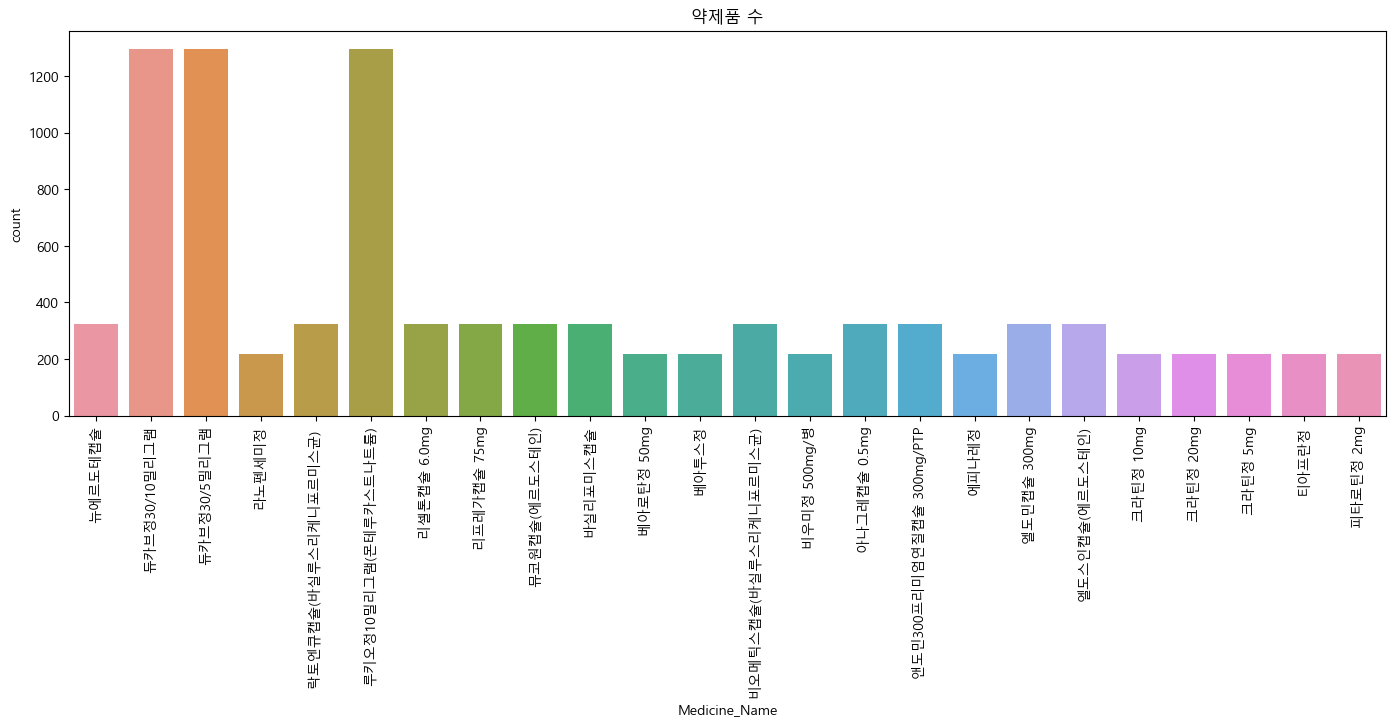

In [ ]:
plt.figure(figsize=(17, 5))
plt.title("약제품 수")
plt.xticks(rotation=90)
sns.barplot(data=df3, x='Medicine_Name', y='count')

In [ ]:
spac = df2[df2['Medicine_Name'].str.contains('듀카브정30/10밀리그램|듀카브정30/5밀리그램|루키오정10밀리그램')].index
df4 = df2.drop(spac)
df4 = df4.sample(frac=1).reset_index(drop=True) 
df4

,PNG,Medicine_Name
0,K-038927/K-038927_0_0_0_1_90_140_200.png,락토엔큐캡슐(바실루스리케니포르미스균)
1,K-038914/K-038914_0_0_1_1_90_280_200.png,크라틴정 5mg
2,K-038884/K-038884_0_0_0_0_75_300_200.png,에피나레정
3,K-038927/K-038927_0_0_0_1_70_020_200.png,락토엔큐캡슐(바실루스리케니포르미스균)
4,K-038914/K-038914_0_0_1_2_75_080_200.png,크라틴정 5mg
...,...,...
5719,K-038927/K-038927_0_0_0_0_75_140_200.png,락토엔큐캡슐(바실루스리케니포르미스균)
5720,K-038929/K-038929_0_0_0_1_90_040_200.png,아나그레캡슐 0.5mg
5721,K-038962/K-038962_0_2_1_2_90_100_200.png,앤도민300프리미엄연질캡슐 300mg/PTP
5722,K-038910/K-038910_0_0_1_0_70_020_200.png,바실리포미스캡슐


<AxesSubplot:title={'center':'약제품 수'}, xlabel='Medicine_Name', ylabel='count'>

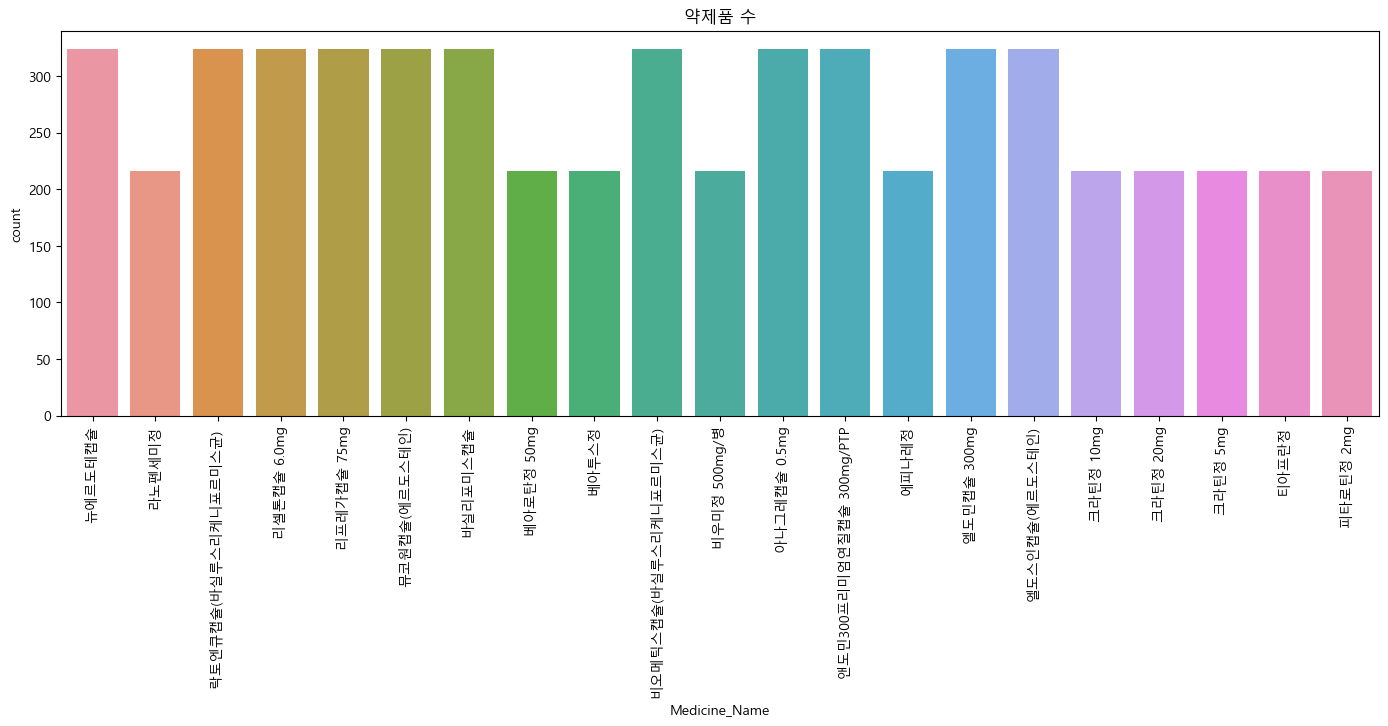

In [ ]:
group_df2 = df4[['Medicine_Name']]
tmp2 = group_df2.groupby(['Medicine_Name']).value_counts()
df2_fig = pd.DataFrame(data={'count': tmp2.values}, index=tmp2.index).reset_index()

plt.figure(figsize=(17, 5))
plt.title("약제품 수")
plt.xticks(rotation=90)
sns.barplot(data=df2_fig, x='Medicine_Name', y='count')

In [ ]:
def draw_category_images(var,cols=3):
    categories = (bee_df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    for i, cat in enumerate(categories):
        sample = bee_df[bee_df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMAGE_PATH + sample.iloc[j]['file']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.suptitle('나라별 꿀벌')
    plt.tight_layout()
    plt.show()

In [ ]:
train_df, test_df = train_test_split(df2, test_size=0.2, random_state=42, stratify=df2['Medicine_Name'])

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Medicine_Name'])

In [ ]:
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))
print("Val   set rows: {}".format(val_df.shape[0]))

Train set rows: 6151
Test  set rows: 1923
Val   set rows: 1538


In [ ]:
def read_image(file_name):
    image = skimage.io.imread(IMAGE_PATH + file_name)
    image = skimage.transform.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), mode='reflect')
    return image[:,:,:IMAGE_CHANNELS]

In [ ]:
def categories_encoder(dataset, var='Medicine_Name'):
    X = np.stack(dataset['PNG'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [ ]:
X_train, y_train = categories_encoder(train_df)
X_val, y_val = categories_encoder(val_df)
X_test, y_test = categories_encoder(test_df)

In [ ]:
n_class = len(cls)
model = tf.keras.models.Sequential()
model.add(tf.keras.applications.densenet.DenseNet121(
    weights="imagenet", 
    include_top=False, 
    input_shape=(64, 64, 3)
    ))
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(y_train.columns.size, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
image_generator = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=180,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True)
image_generator.fit(X_train)

In [ ]:
%%time
train_model1  = model1.fit_generator(image_generator.flow(X_train, y_train, batch_size=32),
                        epochs=5,
                        validation_data=[X_val, y_val],
                        steps_per_epoch=len(X_train)/32)

In [ ]:
%%time
history = model.fit(X_train, y_train, epochs=4,
                            validation_data=(X_val, y_val))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])